# Ouray Tax Assessor - Data Analysis (pre-modeling)

Author: **Bryce A Young** (git bryceayoung) | 
Created: **2024-02-19** | 
Modified: **2025-02-19**

In this notebook, we analyze data relationships and distributions of building features from Ouray County tax assessor. The dataframe that we use for this analysis was created in `data_prep/assessor_data_cleaning.ipynb`. We join the tax assessor data to the building centroids, completing the dataset (sans risk scores).

#### Data 
- (tabular) data/tax_assessor/assessor_clean_v3.csv
- (geom) data/_temp/centr_hiz_parcel.gpkg

#### Workflow 
- Unstructured, freeform exploration of data distributions and relationships (it might be messy)

## Step 0: Setup Environment
---

In [41]:
import os
### Directory ###
# Repository
os.chdir(r'D:/_PROJECTS/P001_OurayParcel/ouray')
# Root workspace
ws = r'D:/_PROJECTS/P001_OurayParcel'

### Data paths ###
# Folder where all the data inputs and outputs will live
data = os.path.join(ws, 'data')
# Folder with tax assessor data
tax = os.path.join(data, 'tax_assessor')
# Scratch folder (contains footprint centroids with hiz info)
scratch = os.path.join(data, '_temp')
# Any final outputs go here
out = os.path.join(data, '_out')
# Figures to export
figs = os.path.join(out, 'figures')

# Ensure correct working directory
os.getcwd()

'D:\\_PROJECTS\\P001_OurayParcel\\ouray'

## Step 1: Import Data
---

In [42]:
import pandas as pd
# Read in assessor database
df = pd.read_csv(os.path.join(tax, 'assessor_clean_v3.csv'))
# Set option to display max cols
pd.set_option('display.max_columns', None)
# Preview
df.head()

,Account Number,Actual Year Built\n(AYB),Air Conditioning\n(AIRC),Architecture Style\n(ARCH),Area Acres\n(Area_ACRES),Area SQFT\n(Area_SQFT),Condition\n(COND),DGR - Detached Garage\n(SubArea_DGR),Effective Year Built\n(EYB),Exterior Percent\n(EXW_PERCENT),Exterior Wall\n(EXW),Floor\n(FLR),Foundation\n(FOUND),Frame\n(FRME),Heating Fuel\n(HTFL),Interior Wall\n(INT),Neighborhood\n(NBHD),OPP - Open Porch\n(SubArea_OPP),PTO - Patio\n(SubArea_PTO),Parcel Number,RMS\n(RMS),Roof Cover\n(RCVR),Roof Structure\n(RSTR),Type,WBL - Wood Balcony\n(SubArea_WBL)
0,M000034,1976.0,0 - N/A,0 - PRE-HUD,0.0,1064.0,5 - BELOW AVERAGE,0.0,1995.0,100.0,22 - ALUM,1 - WDJST PLYW,0.0,2 - FRME 2X4,3 - GAS,0 - N/A,1000200 - 4J MH PARK,176.0,0.0,MOBILEM00034,0.000000,3 - METAL,4 - ARCH,Mobile Home,0.0
1,M000037,1992.0,0 - N/A,1 - SINGLE,0.0,840.0,3 - GOOD,0.0,2005.0,100.0,4 - FRAME,1 - WDJST PLYW,0.0,3 - FRME 2X6,3 - GAS,1 - DRYWALL,1000200 - 4J MH PARK,160.0,0.0,MOBILEM00037,0.000000,3 - METAL,3 - GABLE,Mobile Home,0.0
2,M000040,1985.0,0 - N/A,1 - SINGLE,0.0,980.0,4 - AVERAGE,0.0,1985.0,100.0,4 - FRAME,1 - WDJST PLYW,0.0,2 - FRME 2X4,3 - GAS,2 - PLSTR/LTH,1000100 - SWISS VILLAGE MH PARK,104.0,0.0,MOBILEM00040,0.776148,3 - METAL,3 - GABLE,Mobile Home,0.0
3,M000042,2002.0,0 - N/A,1 - SINGLE,0.0,1216.0,4 - AVERAGE,0.0,2005.0,100.0,3 - DESTRESSED METAL,1 - WDJST PLYW,0.0,2 - FRME 2X4,3 - GAS,1 - DRYWALL,1000100 - SWISS VILLAGE MH PARK,212.0,0.0,MOBILEM00042,0.000000,3 - METAL,3 - GABLE,Mobile Home,0.0
4,M000043,1975.0,0 - N/A,0 - PRE-HUD,0.0,1064.0,4 - AVERAGE,0.0,1995.0,100.0,3 - DESTRESSED METAL,1 - WDJST PLYW,0.0,2 - FRME 2X4,3 - GAS,0 - N/A,1000200 - 4J MH PARK,24.0,0.0,MOBILEM00043,0.000000,3 - METAL,3 - GABLE,Mobile Home,0.0


In [3]:
df.info

<bound method DataFrame.info of      Account Number  Actual Year Built\n(AYB) Air Conditioning\n(AIRC)  \
0           M000034                    1976.0                  0 - N/A   
1           M000037                    1992.0                  0 - N/A   
2           M000040                    1985.0                  0 - N/A   
3           M000042                    2002.0                  0 - N/A   
4           M000043                    1975.0                  0 - N/A   
...             ...                       ...                      ...   
3471        R006937                    2023.0                  0 - N/A   
3472        R006938                    2023.0                  0 - N/A   
3473        R006947                    2023.0                  0 - N/A   
3474        R006948                    2023.0                  0 - N/A   
3475        R006955                    1964.0                  0 - N/A   

     Architecture Style\n(ARCH)  Area Acres\n(Area_ACRES)  \
0                 

In [43]:
import geopandas as gpd
gdf = gpd.read_file(os.path.join(scratch, 'centr_hiz_parcel.gpkg'))
gdf.head()

,County,wui_class,min_ssd,mean_cc0_2m,mean_cc2_4m,mean_cc4_8m,mean_cc8_40m,intersections,PARCELNB,ACCOUNT,ACRES_calc,hiz_ext_out,geometry
0,Ouray County,5,221.938317,NaN,NaN,NaN,NaN,0,403535300013,R002619,40.3299,True,POINT (233065.909 4241052.6)
1,Ouray County,5,11.936200,0.079294,0.119998,0.066202,0.003467,2,403726200085,R002417,35.8913,False,POINT (242785.257 4243534.402)
2,Ouray County,1,213.672097,0.032280,0.038839,0.006272,0.000000,0,403915300016,R004080,40.1202,False,POINT (251212.196 4245423.292)
3,Ouray County,5,183.675975,0.063696,0.097281,0.033223,0.082861,0,403736200037,R002506,39.7779,False,POINT (244097.801 4241432.894)
4,Ouray County,5,101.386718,0.037428,0.219677,0.253634,0.000842,0,403925218002,R004877,16.5952,True,POINT (254078.896 4242776.879)


## Step 2: Merge Tax and HIZ data
---
Let's see what the prefixes are for the accounts between the footprints and the tax assessor data.

In [44]:
# Extract the first character from each ACCOUNT value
gdf['prefix'] = gdf['ACCOUNT'].astype(str).str[0]  # Ensure it's a string and grab the first character

# Count occurrences of each unique prefix
prefix_counts = gdf['prefix'].value_counts()

# Display results
print(prefix_counts)

prefix
R    4435
N      45
C      11
F      10
M       9
U       8
S       3
T       3
H       2
1       1
B       1
A       1
K       1
D       1
V       1
E       1
Name: count, dtype: int64


In [45]:
# Extract the first character from each ACCOUNT value
df['prefix'] = df['Account Number'].astype(str).str[0]  # Ensure it's a string and grab the first character

# Count occurrences of each unique prefix
prefix_counts = df['prefix'].value_counts()

# Display results
print(prefix_counts)

prefix
R    3337
M     139
Name: count, dtype: int64


Okay, so we can see that there is a mismatch of the number of homes that have tax assessor information and the number of homes that are in the building footprints database. Namely, there are quite a few homes missing from the assessor database. Additionally, there are 9 mobile homes in the mbf dataframe and 139 in the tax assessor dataframe. This could be related to the fact that some parcels have upwards of 40 homes on them...my hunch is that these are mobile home lots.

In [46]:
# How many accounts do the datasets have in common?
print(int(gdf['ACCOUNT'].isin(df['Account Number']).sum()))
print(int(df['Account Number'].isin(gdf['ACCOUNT']).sum()))

4014
2485


In [47]:
# How many unique account numbers are in the centroids?
int(gdf['ACCOUNT'].nunique())

2750

There are 2485 accounts that are common between the two datasets. This is probably satisfactory to work with, but it means that there is a huge caveat in this research that multiple structures per parcel are not accounted for.

My next move is to continue with the analysis. If I have time to go back and re-work this, I will. But for now, I just need to acknowledge it as a bug and move on.

In [48]:
# Print the number of observations per dataset so I can see if this changes after the merge
print(f'gdf rows: {len(gdf)}')
print(f'df rows: {len(df)}')

gdf rows: 4533
df rows: 3476


Let's merge tax assessor data to the building centroids. At that point, we will have a full dataset!

In [49]:
# Merge df into gdf using 'Account Number' from df and 'ACCOUNT' from gdf
gdf = gdf.merge(df, left_on='ACCOUNT', right_on='Account Number', how='left')
# Drop 'Account Number' since it is redundant with 'ACCOUNT'
gdf.drop(columns=['Account Number'], inplace=True)

print(len(gdf))
gdf.head()

4533


,County,wui_class,min_ssd,mean_cc0_2m,mean_cc2_4m,mean_cc4_8m,mean_cc8_40m,intersections,PARCELNB,ACCOUNT,ACRES_calc,hiz_ext_out,geometry,prefix_x,Actual Year Built\n(AYB),Air Conditioning\n(AIRC),Architecture Style\n(ARCH),Area Acres\n(Area_ACRES),Area SQFT\n(Area_SQFT),Condition\n(COND),DGR - Detached Garage\n(SubArea_DGR),Effective Year Built\n(EYB),Exterior Percent\n(EXW_PERCENT),Exterior Wall\n(EXW),Floor\n(FLR),Foundation\n(FOUND),Frame\n(FRME),Heating Fuel\n(HTFL),Interior Wall\n(INT),Neighborhood\n(NBHD),OPP - Open Porch\n(SubArea_OPP),PTO - Patio\n(SubArea_PTO),Parcel Number,RMS\n(RMS),Roof Cover\n(RCVR),Roof Structure\n(RSTR),Type,WBL - Wood Balcony\n(SubArea_WBL),prefix_y
0,Ouray County,5,221.938317,NaN,NaN,NaN,NaN,0,403535300013,R002619,40.3299,True,POINT (233065.909 4241052.6),R,2000.0,0 - N/A,7 - MTN CABIN,0.0,1696.5,3 - GOOD,0.0,2000.0,100.0,16 - REAL LOG,3 - WDJST HDWD,0.0,9 - FRME 2X4,2 - WOOD,7 - LOG,7000004 - Outlying4,228.0,0.0,403535300013,0.776148,9 - PRO PANEL,3 - SHED MED,Residence,0.0,R
1,Ouray County,5,11.936200,0.079294,0.119998,0.066202,0.003467,2,403726200085,R002417,35.8913,False,POINT (242785.257 4243534.402),R,1999.0,0 - N/A,1 - RANCH,0.0,2006.0,3 - GOOD,0.0,2005.0,100.0,9 - MASONITE,1 - WDJST PLYW,0.0,9 - FRME 2X4,7 - PROPANE,1 - DRYWALL,7000006 - Outlying6,0.0,577.5,403726200085,0.776148,9 - PRO PANEL,3 - SHED MED,Residence,0.0,R
2,Ouray County,1,213.672097,0.032280,0.038839,0.006272,0.000000,0,403915300016,R004080,40.1202,False,POINT (251212.196 4245423.292),R,2009.0,0 - N/A,1 - RANCH,0.0,1725.0,2 - VERY GOOD,0.0,2010.0,90.0,5 - STUCCO (F),4 - CONC/TILE,0.0,9 - FRME 2X4,3 - GAS,1 - DRYWALL,7000006 - Outlying6,560.0,0.0,403915300016,0.776148,3 - DISTRESSED METAL,6 - GABEL MED,Residence,0.0,R
3,Ouray County,5,183.675975,0.063696,0.097281,0.033223,0.082861,0,403736200037,R002506,39.7779,False,POINT (244097.801 4241432.894),R,1996.0,0 - N/A,7 - MTN CABIN,0.0,692.6,3 - GOOD,0.0,2005.0,100.0,2 - WOOD,5 - CONCRETE,0.0,0 - N/A,2 - WOOD,1 - DRYWALL,7000006 - Outlying6,0.0,0.0,403736200037,0.000000,5 - ASPH SHNGL,3 - SHED MED,Residence,0.0,R
4,Ouray County,5,101.386718,0.037428,0.219677,0.253634,0.000842,0,403925218002,R004877,16.5952,True,POINT (254078.896 4242776.879),R,2004.0,0 - N/A,5 - MODULAR,0.0,894.0,3 - GOOD,0.0,2010.0,100.0,9 - MASONITE,1 - WDJST PLYW,0.0,9 - FRME 2X4,7 - PROPANE,1 - DRYWALL,7000006 - Outlying6,179.0,0.0,403925218002,0.776148,9 - PRO PANEL,6 - GABEL MED,Residence,0.0,R


In [50]:
gdf['PARCELNB'].nunique()

2727

In [51]:
gdf['ACCOUNT'].nunique()

2750

In [52]:
gdf['ACCOUNT'].isna().sum()

np.int64(5)

In [53]:
df['Account Number'].nunique()

3476

In [54]:
print(int(gdf['Type'].isna().sum())) # How many accounts didn't get tranferred?
print(int(gdf['Type'].notna().sum())) # How many did?

519
4014


In [55]:
print(int(gdf['mean_cc0_2m'].isna().sum())) # How many houses don't I have defensible space info for?

20


So I guess there were buildings without account numbers. I can relate this to parcels spatially, so I will keep these, especially since I am not using it as a predictor variable. However, I want to drop rows where my predictor variables are NA. Where gdf['Type'].isnan() == True (519 rows), information did not get copied from tax assessor data, so I will drop these rows. Where gdf['mean_cc0_2m'].isnan() == True (20 rows), there is no defensible space information. The total number of rows is 539. 

The alternative is to treat NA values as their own class. I will save these as two geopackages so that I can decide this later. One with NA values and one without NA values.

## Step 2.5: Save Merged Data to Final Outputs
---

In [56]:
# Remove unnecessary columns
gdf.drop(columns=['prefix_x', 'prefix_y', 'Parcel Number'], inplace=True)
# Save gdf with NA values
gdf.to_file(os.path.join(out, 'centr_full_WKID26913.gpkg'), driver='GPKG', index=False)

# Remove all rows with NA values in defensible space or structure features
gdf = gdf.dropna(subset=['Type', 'mean_cc0_2m'])
# Save gdf without NA values
gdf.to_file(os.path.join(out, 'centr_full_nonan_WKID26913.gpkg'), driver='GPKG', index=False)

In [38]:
# Save assessor data to output
df.to_csv(os.path.join(out, 'assessor_feat.csv'), index=False)

## Step 3: Analysis of Structure Features
---
### 3a. Numeric features
So I've already done analysis on hiz features. I want to start by doing analysis on just structure features now. After that we will analyze relationships between structure and defensible space features. 

In [57]:
gdf.head()

,County,wui_class,min_ssd,mean_cc0_2m,mean_cc2_4m,mean_cc4_8m,mean_cc8_40m,intersections,PARCELNB,ACCOUNT,ACRES_calc,hiz_ext_out,geometry,Actual Year Built\n(AYB),Air Conditioning\n(AIRC),Architecture Style\n(ARCH),Area Acres\n(Area_ACRES),Area SQFT\n(Area_SQFT),Condition\n(COND),DGR - Detached Garage\n(SubArea_DGR),Effective Year Built\n(EYB),Exterior Percent\n(EXW_PERCENT),Exterior Wall\n(EXW),Floor\n(FLR),Foundation\n(FOUND),Frame\n(FRME),Heating Fuel\n(HTFL),Interior Wall\n(INT),Neighborhood\n(NBHD),OPP - Open Porch\n(SubArea_OPP),PTO - Patio\n(SubArea_PTO),RMS\n(RMS),Roof Cover\n(RCVR),Roof Structure\n(RSTR),Type,WBL - Wood Balcony\n(SubArea_WBL)
1,Ouray County,5,11.936200,0.079294,0.119998,0.066202,0.003467,2,403726200085,R002417,35.8913,False,POINT (242785.257 4243534.402),1999.0,0 - N/A,1 - RANCH,0.0,2006.0,3 - GOOD,0.0,2005.0,100.0,9 - MASONITE,1 - WDJST PLYW,0.0,9 - FRME 2X4,7 - PROPANE,1 - DRYWALL,7000006 - Outlying6,0.0,577.5,0.776148,9 - PRO PANEL,3 - SHED MED,Residence,0.0
2,Ouray County,1,213.672097,0.032280,0.038839,0.006272,0.000000,0,403915300016,R004080,40.1202,False,POINT (251212.196 4245423.292),2009.0,0 - N/A,1 - RANCH,0.0,1725.0,2 - VERY GOOD,0.0,2010.0,90.0,5 - STUCCO (F),4 - CONC/TILE,0.0,9 - FRME 2X4,3 - GAS,1 - DRYWALL,7000006 - Outlying6,560.0,0.0,0.776148,3 - DISTRESSED METAL,6 - GABEL MED,Residence,0.0
3,Ouray County,5,183.675975,0.063696,0.097281,0.033223,0.082861,0,403736200037,R002506,39.7779,False,POINT (244097.801 4241432.894),1996.0,0 - N/A,7 - MTN CABIN,0.0,692.6,3 - GOOD,0.0,2005.0,100.0,2 - WOOD,5 - CONCRETE,0.0,0 - N/A,2 - WOOD,1 - DRYWALL,7000006 - Outlying6,0.0,0.0,0.000000,5 - ASPH SHNGL,3 - SHED MED,Residence,0.0
4,Ouray County,5,101.386718,0.037428,0.219677,0.253634,0.000842,0,403925218002,R004877,16.5952,True,POINT (254078.896 4242776.879),2004.0,0 - N/A,5 - MODULAR,0.0,894.0,3 - GOOD,0.0,2010.0,100.0,9 - MASONITE,1 - WDJST PLYW,0.0,9 - FRME 2X4,7 - PROPANE,1 - DRYWALL,7000006 - Outlying6,179.0,0.0,0.776148,9 - PRO PANEL,6 - GABEL MED,Residence,0.0
5,Ouray County,3,20.213243,0.056646,0.058065,0.112239,0.181261,2,404129300015,R004133,398.9760,False,POINT (257784.354 4241777.874),1958.0,1 - NONE,1 - RANCH,0.0,1262.0,3 - GOOD,0.0,1995.0,100.0,9 - MASONITE,1 - WDJST PLYW,0.0,9 - FRME 2X4,7 - PROPANE,3 - PANELING,7000002 - Outlying2,0.0,0.0,0.000000,9 - PRO PANEL,6 - GABEL MED,Residence,0.0


The first thing we're going to do is separate the numerical structure features from the categorical features. 

In [ ]:
# Print the structure feature columns
gdf.columns[-23:]

Index(['Actual Year Built\n(AYB)', 'Air Conditioning\n(AIRC)',
       'Architecture Style\n(ARCH)', 'Area Acres\n(Area_ACRES)',
       'Area SQFT\n(Area_SQFT)', 'Condition\n(COND)',
       'DGR - Detached Garage\n(SubArea_DGR)', 'Effective Year Built\n(EYB)',
       'Exterior Percent\n(EXW_PERCENT)', 'Exterior Wall\n(EXW)',
       'Floor\n(FLR)', 'Foundation\n(FOUND)', 'Frame\n(FRME)',
       'Heating Fuel\n(HTFL)', 'Interior Wall\n(INT)', 'Neighborhood\n(NBHD)',
       'OPP - Open Porch\n(SubArea_OPP)', 'PTO - Patio\n(SubArea_PTO)',
       'RMS\n(RMS)', 'Roof Cover\n(RCVR)', 'Roof Structure\n(RSTR)', 'Type',
       'WBL - Wood Balcony\n(SubArea_WBL)'],
      dtype='object')

In [66]:
# Categorical structure features (n=12)
cat_cols = [
    'Air Conditioning\n(AIRC)', 
    'Architecture Style\n(ARCH)', 
    'Condition\n(COND)',
    'Exterior Wall\n(EXW)',
    'Floor\n(FLR)',
    'Frame\n(FRME)',
    'Heating Fuel\n(HTFL)', 
    'Interior Wall\n(INT)', 
    'Neighborhood\n(NBHD)',
    'Roof Cover\n(RCVR)', 
    'Roof Structure\n(RSTR)', 
    'Type'
            ]
# Numeric structure features (n=11)
num_cols = [
    'Actual Year Built\n(AYB)', 
    'Area Acres\n(Area_ACRES)', 
    'Area SQFT\n(Area_SQFT)',
    'DGR - Detached Garage\n(SubArea_DGR)',
    'Effective Year Built\n(EYB)',
    'Exterior Percent\n(EXW_PERCENT)',
    # 'Foundation\n(FOUND)', Dropped for lack of data
    'OPP - Open Porch\n(SubArea_OPP)', 
    'PTO - Patio\n(SubArea_PTO)',
    'RMS\n(RMS)',
    'WBL - Wood Balcony\n(SubArea_WBL)'
            ]

Let's start by doing some descriptive statistics on the numeric columns. We can see some interesting things in the summary table below. While the mean year built is 1978, the mean effective year built is 2002, meaning that on average there are significant improvements that have  been made to homes in this county. 

Additionally, we can see that there is good information about the square footage of detached garages, open porches, wood balconies, and patios. 

In [63]:
gdf[num_cols].describe()

,Actual Year Built\n(AYB),Area Acres\n(Area_ACRES),Area SQFT\n(Area_SQFT),DGR - Detached Garage\n(SubArea_DGR),Effective Year Built\n(EYB),Exterior Percent\n(EXW_PERCENT),Foundation\n(FOUND),OPP - Open Porch\n(SubArea_OPP),PTO - Patio\n(SubArea_PTO),RMS\n(RMS),WBL - Wood Balcony\n(SubArea_WBL)
count,4002.000000,4002.000000,4002.000000,4002.000000,4002.000000,4002.00000,4002.000000,4002.000000,4002.000000,4002.000000,4002.000000
mean,1978.200036,0.000457,2628.526675,75.710781,2002.032523,95.83908,0.026737,213.036651,112.801249,0.796539,49.879768
std,33.915504,0.015191,3219.837943,240.611810,9.380064,13.83995,0.200062,312.384121,388.673787,1.352012,152.210070
min,1875.000000,0.000000,0.000000,0.000000,1876.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1972.000000,0.000000,1472.000000,0.000000,1995.000000,100.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1990.000000,0.000000,2016.000000,0.000000,2005.000000,100.00000,0.000000,104.000000,0.000000,0.776148,0.000000
75%,2001.000000,0.000000,2880.400000,0.000000,2010.000000,100.00000,0.000000,287.875000,0.000000,0.776148,0.000000
max,2023.000000,0.780000,59415.100000,2000.000000,2023.000000,100.00000,4.000000,2441.500000,5432.400000,12.000000,1460.500000


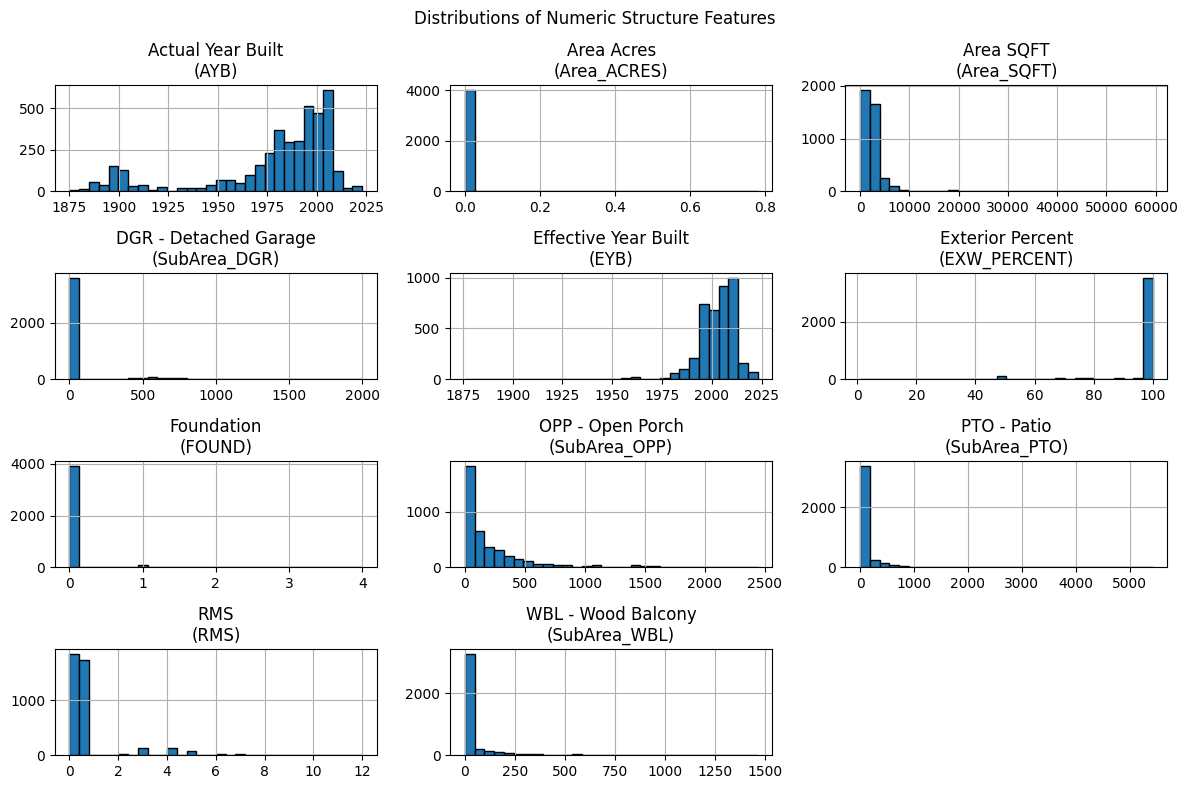

In [65]:
import matplotlib.pyplot as plt

# Histograms for numeric structure features
gdf[num_cols].hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle('Distributions of Numeric Structure Features')
plt.tight_layout()
plt.show()

We can see that Foundation is actually categorical and we don't have information about what these numbers (1-4) actually represent. Therefore, we will drop this column from our data.

In [67]:
# Drop from nonan gdf and save back to file
gdf = gpd.read_file(os.path.join(out, 'centr_full_nonan_WKID26913.gpkg'))
gdf.drop(columns=['Foundation\n(FOUND)'], inplace=True)
gdf.to_file(os.path.join(out, 'centr_full_nonan_WKID26913.gpkg'), driver='GPKG', index=False)
# Drop from full gdf and save back to file
gdf = gpd.read_file(os.path.join(out, 'centr_full_WKID26913.gpkg'))
gdf.drop(columns=['Foundation\n(FOUND)'], inplace=True)
gdf.to_file(os.path.join(out, 'centr_full_WKID26913.gpkg'), driver='GPKG', index=False)

Let's explore data correlations

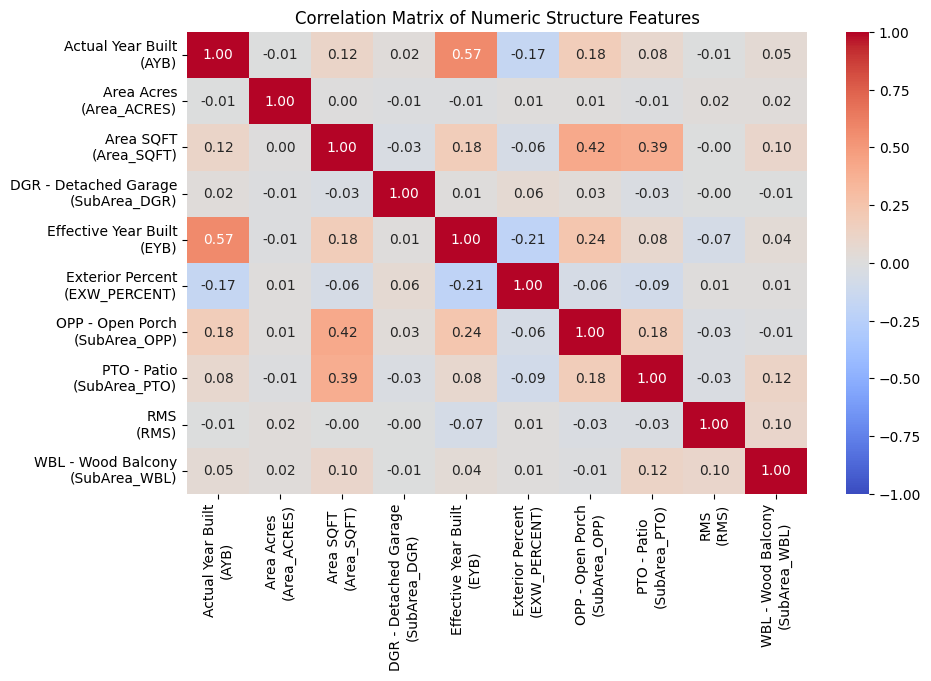

In [68]:
import seaborn as sns
import numpy as np

# Compute correlation matrix
corr_matrix = gdf[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numeric Structure Features")
plt.show()

There are some interesting relationships that can be seen in the above correlation matrix. For instance, 
- Area (sqft) is correlated positively with open porch and patio areas, suggesting that larger homes are more likely to have larger patios and larger open porches in Ouray County. 
- Effective year built is positively correlated with area (sqft) and with open porch sub-area, suggesting that effective year built may be tied to remodels that involve home additions and porch additions or extensions. 
- Effective year built and actual year built are  negatively correlated with exterior percent, suggesting that newer homes and remodeled homes are more likely to use mix materials in their exterior cladding (siding).

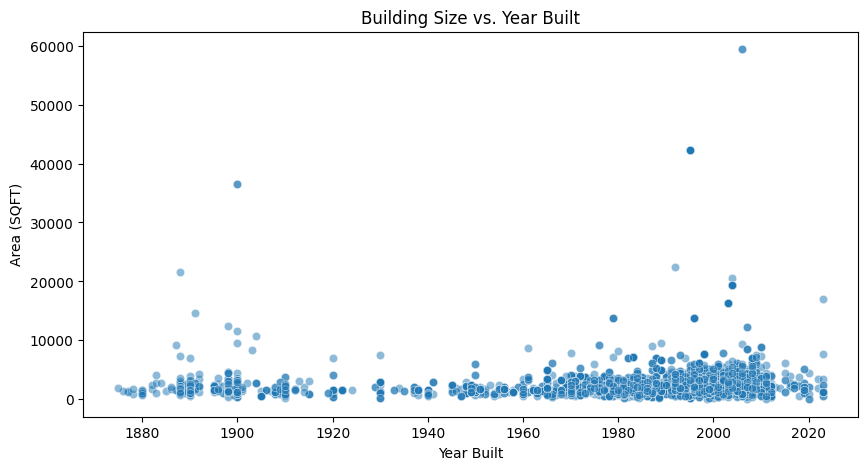

In [69]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=gdf['Actual Year Built\n(AYB)'], y=gdf['Area SQFT\n(Area_SQFT)'], alpha=0.5)
plt.title('Building Size vs. Year Built')
plt.xlabel('Year Built')
plt.ylabel('Area (SQFT)')
plt.show()

I'm interested in the house that was built in 1900 and is 40,000 sqft.

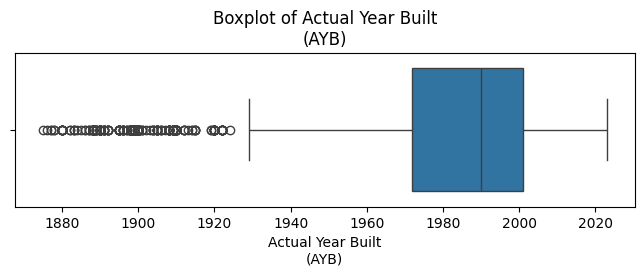

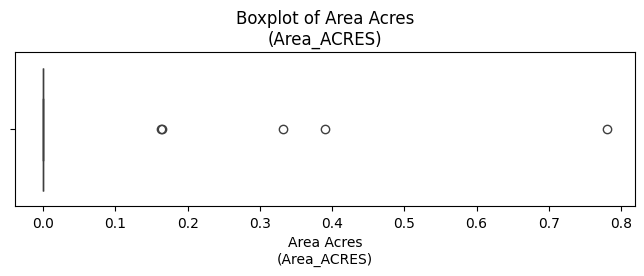

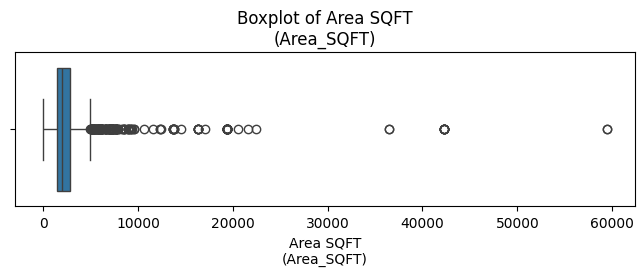

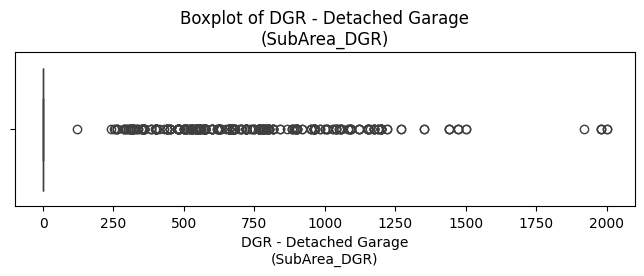

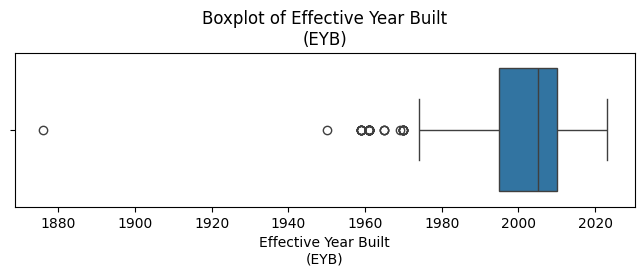

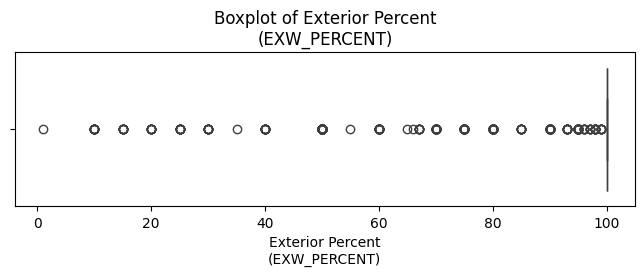

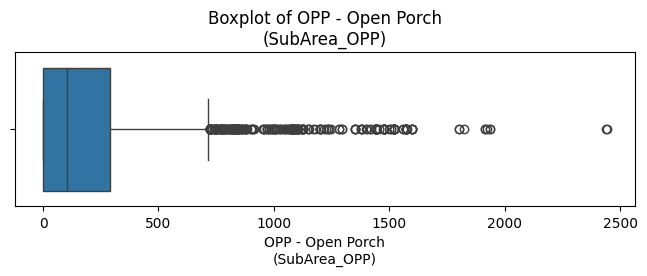

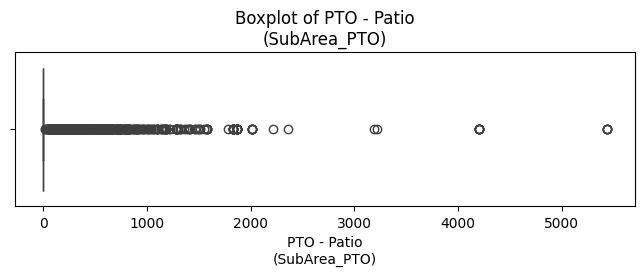

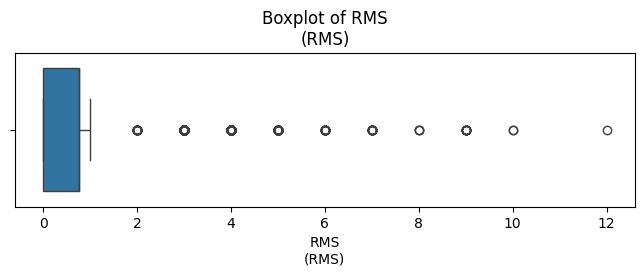

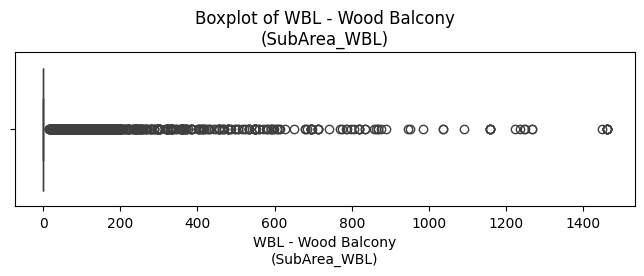

In [70]:
for col in num_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=gdf[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

The above boxplots show that there are many outliers in some of the data columns. For instance, the plot just above this markdown box shows that the vast majority of homes have 0sqft as their wood balcony sub-area. That means most houses simply don't have porches. So we would want to look at data for homes that do have porches. 

### 3b. Spatial patterns of numeric features

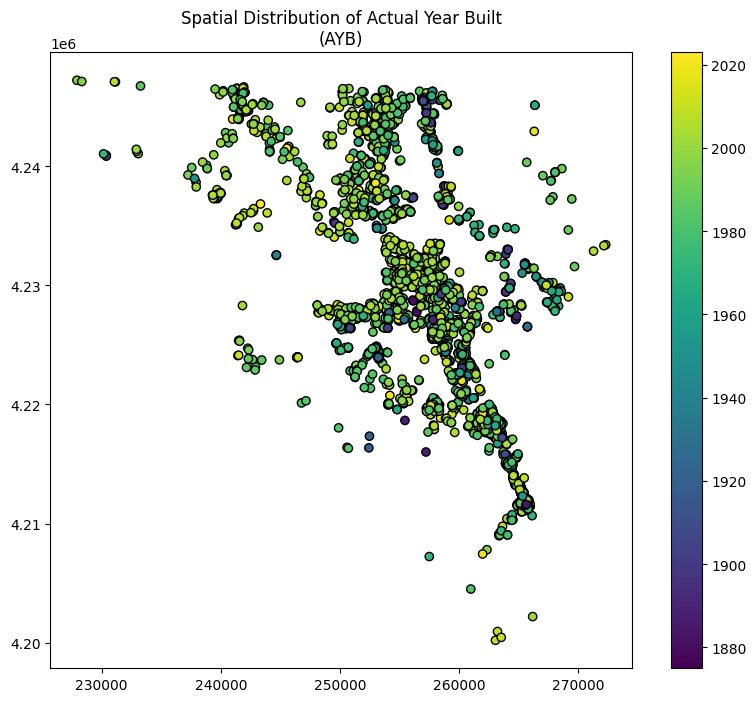

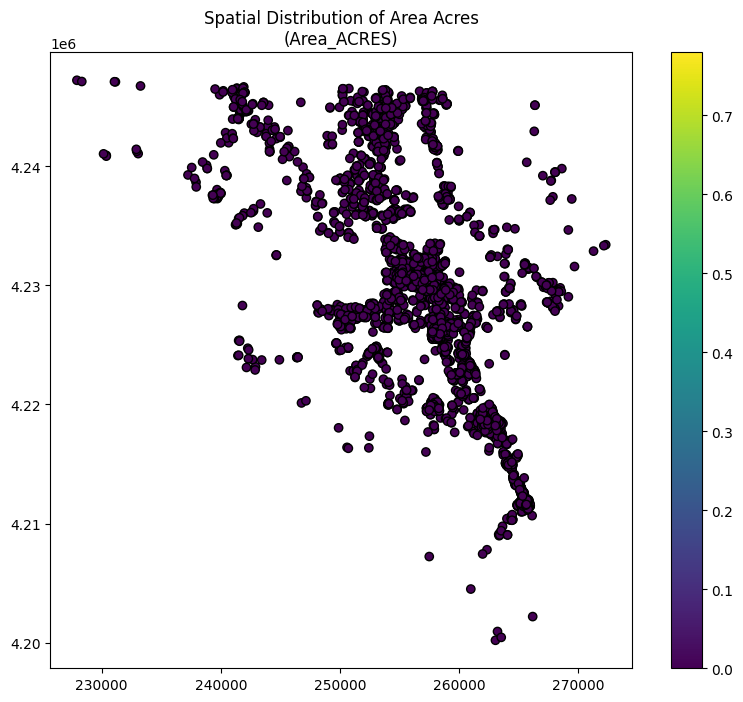

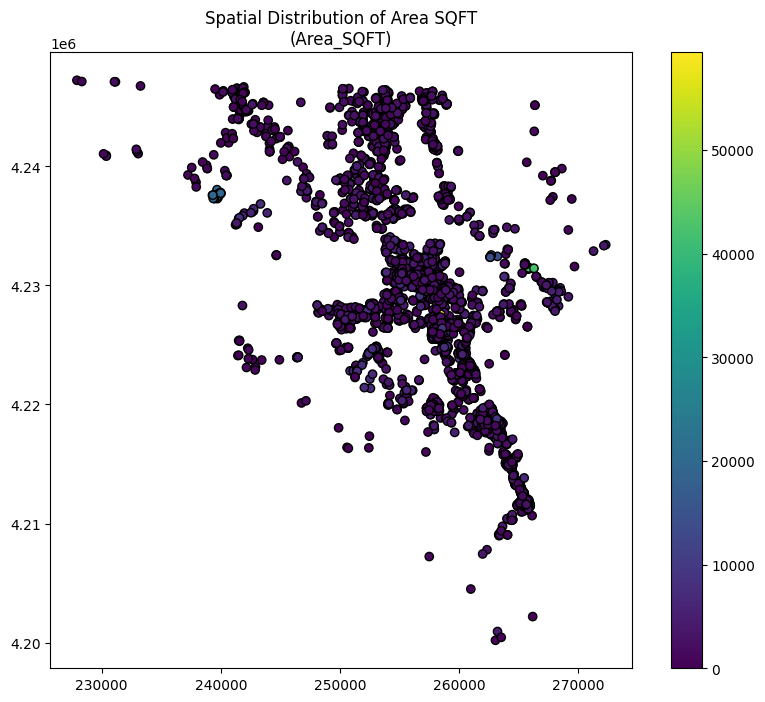

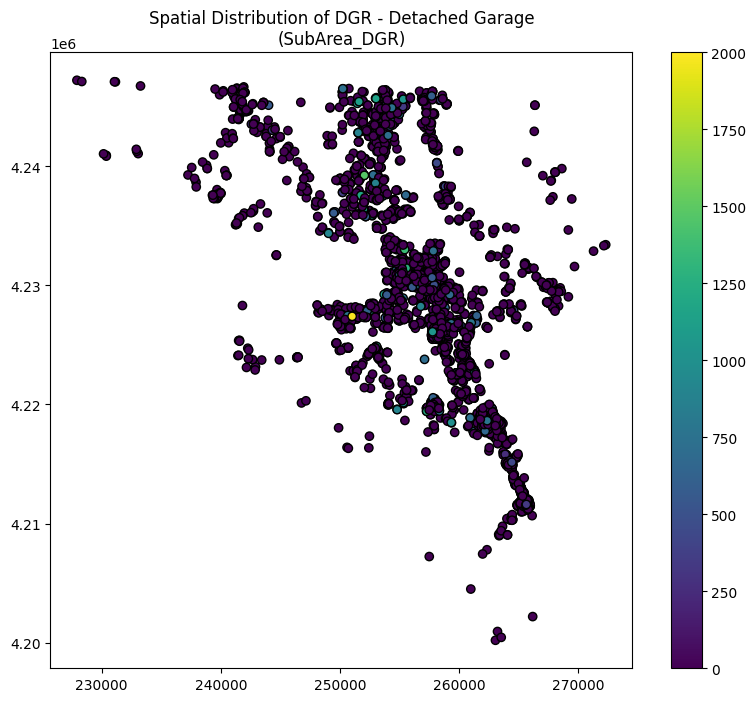

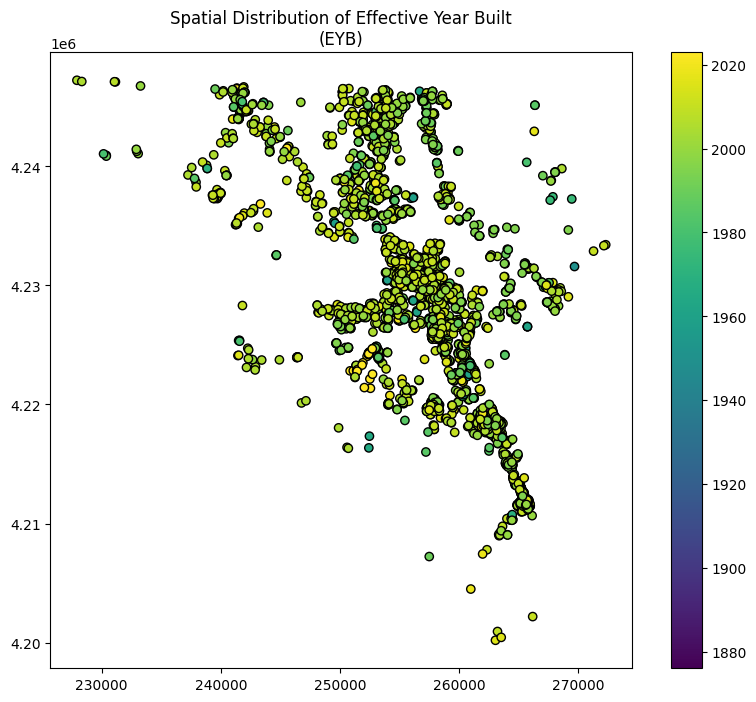

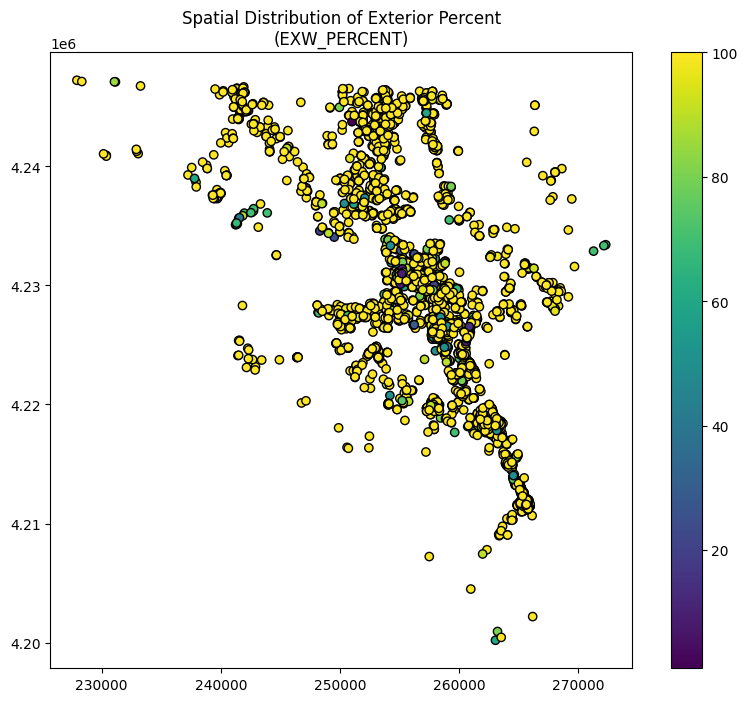

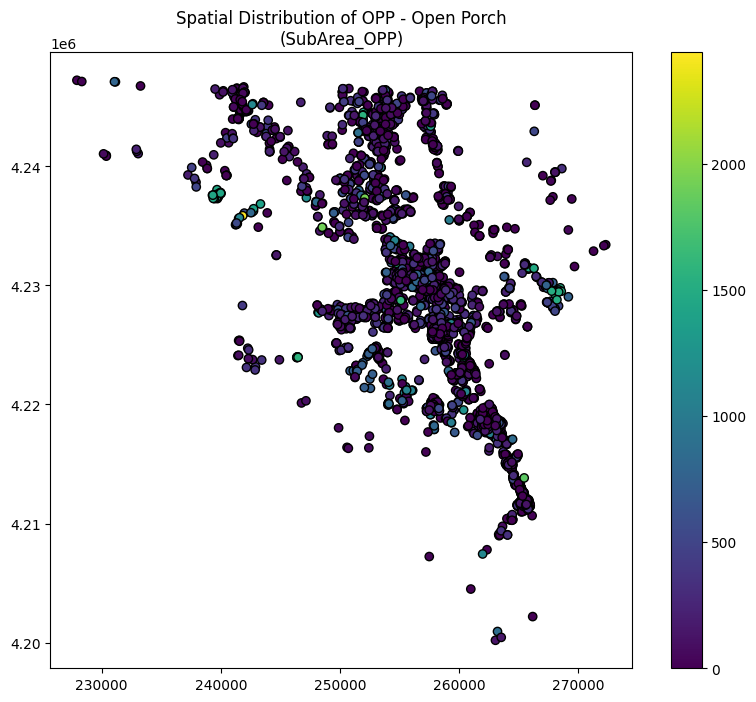

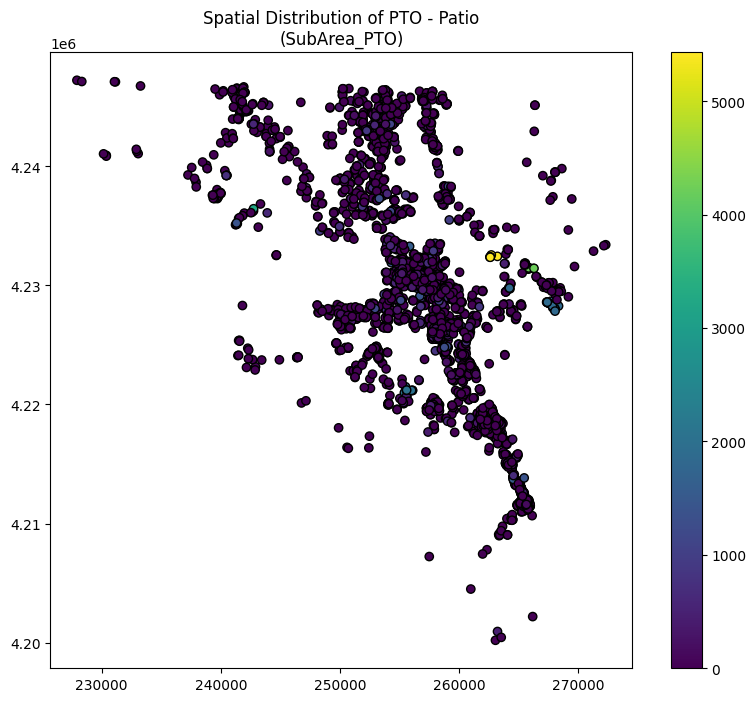

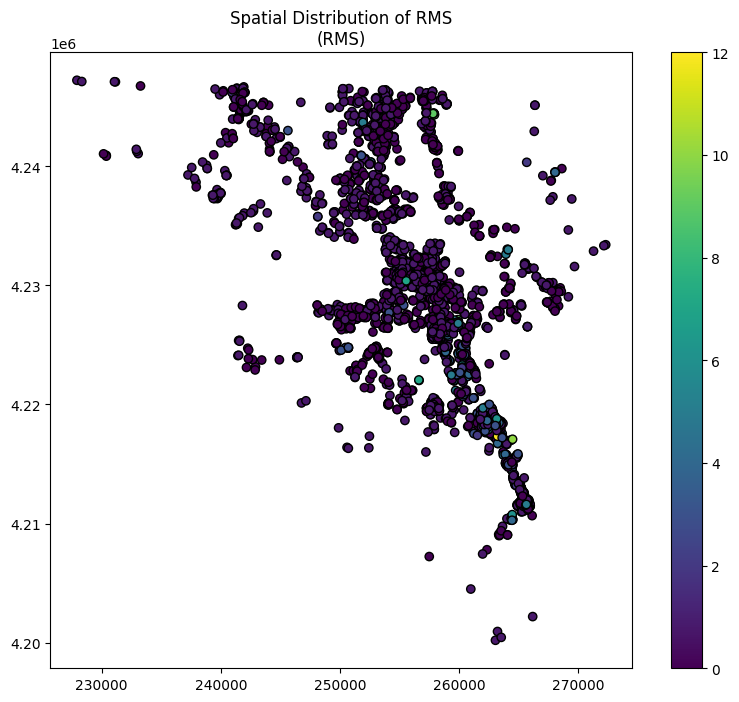

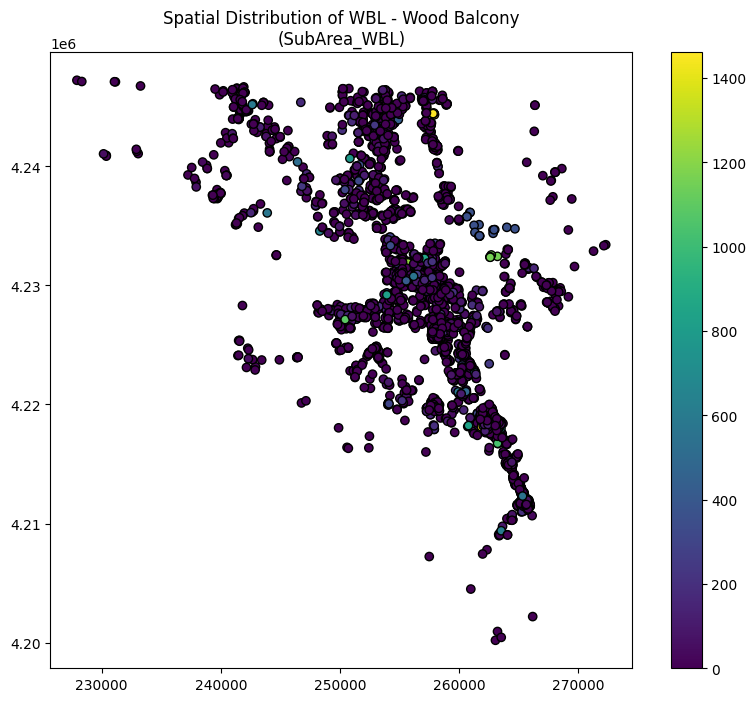

In [71]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Create individual plots for each numeric structure feature
for col in num_cols:
    fig, ax = plt.subplots(figsize=(10, 8))
    gdf.plot(column=col, cmap='viridis', edgecolor='black', legend=True, ax=ax)
    plt.title(f"Spatial Distribution of {col}")
    plt.show()

d:\venv\python\parcel\Lib\site-packages\libpysal\weights\distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 8 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


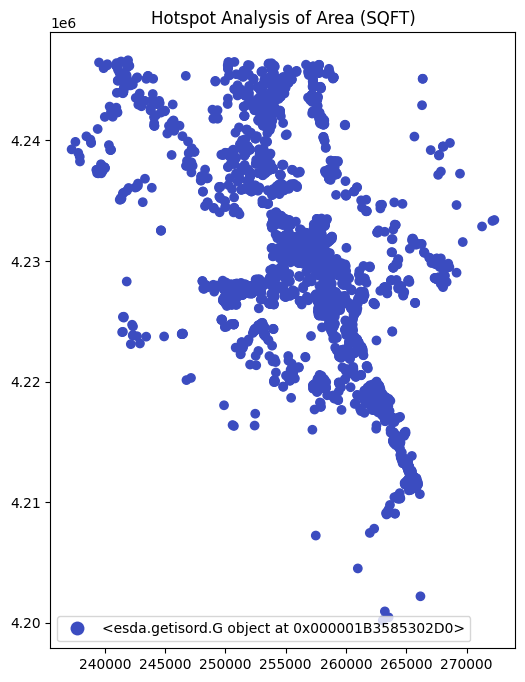

In [76]:
from esda.getisord import G
from libpysal.weights import KNN

# Define spatial weights (nearest neighbors)
w = KNN.from_dataframe(gdf, k=8)
w.transform = 'r'

# Compute Getis-Ord Gi*
gdf["hotspot_Area_SQFT"] = G(gdf["Area SQFT\n(Area_SQFT)"], w)

# Plot results
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(column="hotspot_Area_SQFT", cmap='coolwarm', legend=True, ax=ax)
plt.title("Hotspot Analysis of Area (SQFT)")
plt.show()

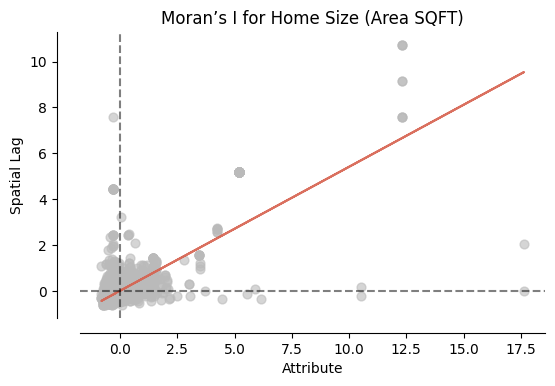

Moran's I: 0.5414315772764926, p-value: 0.0


In [77]:
gdf = gpd.read_file(os.path.join(out, 'centr_full_nonan_WKID26913.gpkg'))

from esda.moran import Moran
from splot.esda import moran_scatterplot

# Compute Moran’s I for home sizes
moran = Moran(gdf['Area SQFT\n(Area_SQFT)'], w)

# Plot Moran’s scatterplot
fig, ax = plt.subplots(figsize=(6, 6))
moran_scatterplot(moran, ax=ax)
plt.title("Moran’s I for Home Size (Area SQFT)")
plt.show()

# Print Moran’s I value
print(f"Moran's I: {moran.I}, p-value: {moran.p_norm}")